# Sequential bootstrap TESTING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

In [2]:
t1 = pd.to_datetime(pd.read_csv("../data/t1.csv", index_col=0, parse_dates=True, squeeze=True))

In [5]:
t1 = t1[-10:]

In [79]:
def get_ind_matrix(bar_ix,t1):
    """Get Indicator matrix"""
    ind_m=(pd.DataFrame(0,index=bar_ix,columns=range(t1.shape[0])))
    for i,(t0,t1) in enumerate(t1.iteritems()):ind_m.loc[t0:t1,i]=1.
    return ind_m

def get_avg_uniqueness(ind_m):
    """Average uniqueness from indicator matrix"""
    c=ind_m.sum(axis=1) # concurrency
    u=ind_m.div(c,axis=0) # uniqueness
    avg_u=u[u>0].mean() # avg. uniqueness
    return avg_u

def seq_bootstrap(ind_m,s_length=None, test=int):
    """Generate a sample via sequential bootstrap"""
    if s_length is None:
        s_length=ind_m.shape[1]
    phi = list(pd.read_csv("../data/sb-phi.csv", squeeze=True))
    while len(phi)<s_length-test:
        print(phi)
#         clear_output()
#         print(f"len(phi) is {len(phi)} which is < than s_length {s_length}")
        avg_u=pd.Series(dtype=float)
#         print(ind_m)
        for i in ind_m:
            ind_m_=ind_m[phi+[i]] # reduce ind_m
            avg_u.loc[i]=get_avg_uniqueness(ind_m_).iloc[-1]
            
        
        prob=avg_u/avg_u.sum() # draw prob
        avg_u.plot()
        phi+=[np.random.choice(ind_m.columns,p=prob)]
        pd.Series(phi, dtype=int).to_csv("../data/sb-phi.csv", index=False)
    return phi

In [89]:
pd.Series([], dtype=int).to_csv("../data/sb-phi.csv", index=False)

[]
[8]
[8, 7]
[8, 7, 1]
[8, 7, 1, 3]


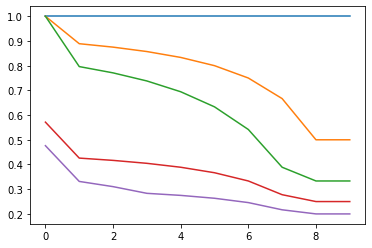

In [90]:
phi_seq=seq_bootstrap(ind_m, test=5)

[8, 7, 1, 3, 2]
[8, 7, 1, 3, 2, 0]
[8, 7, 1, 3, 2, 0, 5]
[8, 7, 1, 3, 2, 0, 5, 4]
[8, 7, 1, 3, 2, 0, 5, 4, 5]


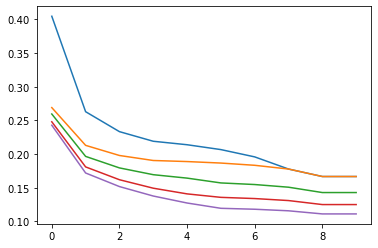

In [91]:
phi_seq=seq_bootstrap(ind_m, test=0)

In [52]:
bar_ix=t1.index # index of bars
ind_m=get_ind_matrix(bar_ix,t1)
phi_random=np.random.choice(ind_m.columns,size=ind_m.shape[1])
phi_seq=seq_bootstrap(ind_m)
print(f'Standard uniqueness: {get_avg_uniqueness(ind_m[phi_random]).mean():.4f}')
print(f'Sequential uniqueness: {get_avg_uniqueness(ind_m[phi_seq]).mean():.4f}')

[7, 4, 0]
0    0.428571
1    0.388889
2    0.375000
3    0.357143
4    0.333333
5    0.333333
6    0.333333
7    0.333333
8    0.333333
9    0.333333
dtype: float64
[7, 4, 0, 0]
0    0.297619
1    0.305556
2    0.302083
3    0.297619
4    0.291667
5    0.300000
6    0.312500
7    0.333333
8    0.333333
9    0.333333
dtype: float64
[7, 4, 0, 0, 6]
0    0.290476
1    0.272222
2    0.264583
3    0.254762
4    0.241667
5    0.240000
6    0.237500
7    0.250000
8    0.250000
9    0.250000
dtype: float64
[7, 4, 0, 0, 6, 0]
0    0.223810
1    0.229630
2    0.227083
3    0.223810
4    0.219444
5    0.223333
6    0.229167
7    0.250000
8    0.250000
9    0.250000
dtype: float64
[7, 4, 0, 0, 6, 0, 7]
0    0.223810
1    0.212963
2    0.208333
3    0.202381
4    0.194444
5    0.193333
6    0.191667
7    0.200000
8    0.200000
9    0.200000
dtype: float64
[7, 4, 0, 0, 6, 0, 7, 6]
0    0.220408
1    0.199206
2    0.192857
3    0.184694
4    0.173810
5    0.168571
6    0.160714
7    0.166667
8    0.1

In [ ]:
seq = list(map(lambda x: t1.index[x], phi_seq))

In [ ]:
new_t1 = t1.reindex(seq)

In [ ]:
new_t1.head(), len(new_t1), len(t1)

In [ ]:
new_t1.to_csv("../data/seq_bootstrap.csv")

In [67]:
# new_t1 = pd.to_datetime(pd.read_csv("../data/seq_bootstrap.csv", index_col=0, parse_dates=True, squeeze=True))

## Plotting

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(t1, alpha=.5, label="original t1")
ax.hist(new_t1, alpha=.5, label="sequentially bootstrapped t1")
ax.set_title("Frequency histogram of original t1 vs sequentially bootstrapped t1")
ax.legend();
